In [1]:
%matplotlib inline
import cv2
import numpy as np

from matplotlib import pyplot as plt

import sys
import json
import base64

In [2]:
import ssl
## make it work in both python2 both python3
IS_PY3 = sys.version_info.major == 3
if IS_PY3:
    from urllib.request import urlopen
    from urllib.request import Request
    from urllib.error import URLError
    from urllib.parse import urlencode
    from urllib.parse import quote_plus
else:
    import urllib2
    from urllib import quote_plus
    from urllib2 import urlopen
    from urllib2 import Request
    from urllib2 import URLError
    from urllib import urlencode

In [3]:
## 跳过 HTTPS 身份验证
ssl._create_default_https_context = ssl._create_unverified_context
API_KEY = 'gbiPfzi98AOeBhKZtHnMirnR'
SECRET_KEY = '5P5Tgdt3gT3snZoWY5G8WdEfBjsMkXw8'
POSE_DETECT = "https://aip.baidubce.com/rest/2.0/image-classify/v1/body_analysis"
""" 开始 TOKEN """
TOKEN_URL = 'https://aip.baidubce.com/oauth/2.0/token'

In [4]:
""" 请求认证 token
"""
def fetch_token():
    params = {'grant_type': 'client_credentials',
        'client_id': API_KEY,
        'client_secret': SECRET_KEY}
    post_data = urlencode(params)
    if (IS_PY3):
        post_data = post_data.encode('utf-8')
    req = Request(TOKEN_URL, post_data)
    try:
        f = urlopen(req, timeout=5)
        result_str = f.read()
    except URLError as err:
        print(err)
    if (IS_PY3):
        result_str = result_str.decode()
    result = json.loads(result_str)
    if ('access_token' in result.keys() and 'scope' in result.keys()):
        if not 'brain_all_scope' in result['scope'].split(' '):
            print ('please ensure has check the ability')
            exit()
        return result['access_token']
    else:
        print ('please overwrite the correct API_KEY and SECRET_KEY')
        exit()


In [5]:
""" 读取图片函数
"""

def read_file(image_path):
    f = None
    try:
        f = open(image_path, 'rb') #用二进制打开图片
        return f.read()
    except:
        print('read image file fail')
        return None
    finally:
        if f:
            f.close()

In [6]:
"""
call remote http server
"""
def request(url, data):
    req = Request(url, data.encode('utf-8'))
    has_error = False
    try:
        f = urlopen(req)
        result_str = f.read()
        if (IS_PY3):
            result_str = result_str.decode()
        return result_str
    except URLError as err:
        print(err)

In [7]:
if __name__ == '__main__':
    ## get access token
    token = fetch_token()
    ## concat url
    url = POSE_DETECT + "?access_token=" + token
    
    file_content = read_file('./img1.jpg')
    response = request(url, urlencode(
    {
        'image': base64.b64encode(file_content),
        'image_type': 'BASE64',
    }))
    data = json.loads(response)


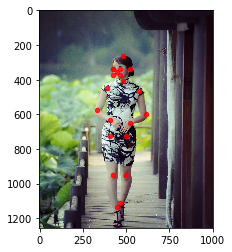

In [8]:
sourceImg = cv2.imread('img1.jpg')
srcImage_new = cv2.cvtColor(sourceImg, cv2.COLOR_BGR2RGB)
plt.imshow(srcImage_new)

poseTrack = data['person_info'][0]['body_parts']
for i in poseTrack:
    plt.scatter(poseTrack[i]['x'],poseTrack[i]['y'],s=20,color='red',alpha=0.8)

plt.show()